In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
import seaborn as sns
#Import Dataset into mdoel
dataset = pd.read_csv('/Users/alykhan/Desktop/CreditRiskModel/Input/credit_risk_dataset.csv')
dataset

/Users/alykhan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


<function matplotlib.pyplot.show(close=None, block=None)>

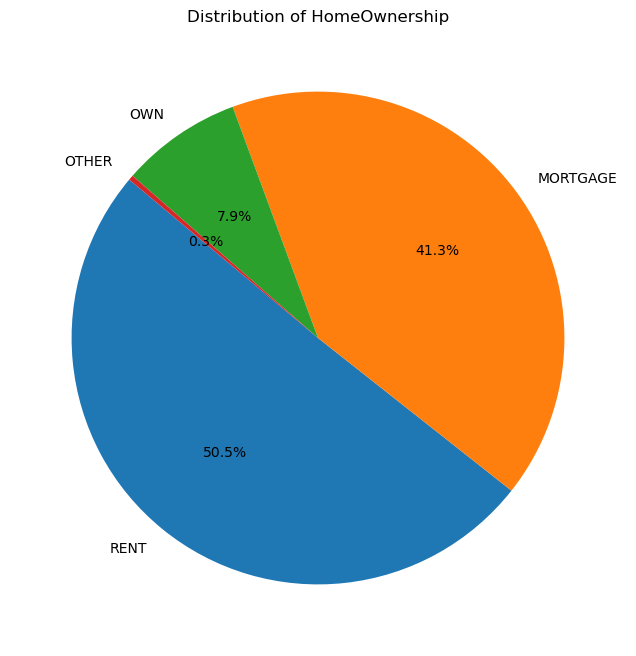

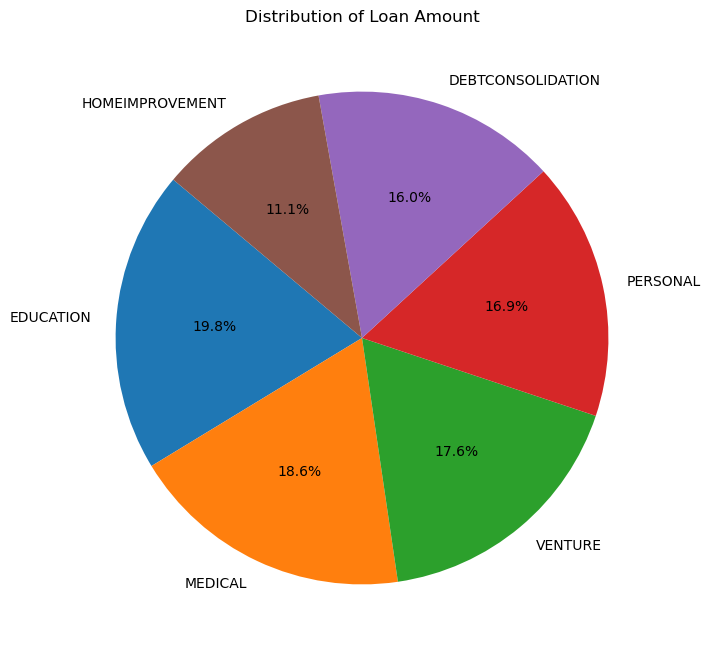

In [2]:
#Data Visualization
# Creating a pie chart to visualise all discrete datapoints in the dataset
column_data = dataset['person_home_ownership'].value_counts()
column_data2 = dataset['loan_intent'].value_counts()

#
plt.figure(figsize=(8, 8))
plt.pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of HomeOwnership')
plt.show

# Creating a pie chart to visualise all discrete datapoints in the dataset
plt.figure(figsize=(8, 8))
plt.pie(column_data2, labels=column_data2.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Amount')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

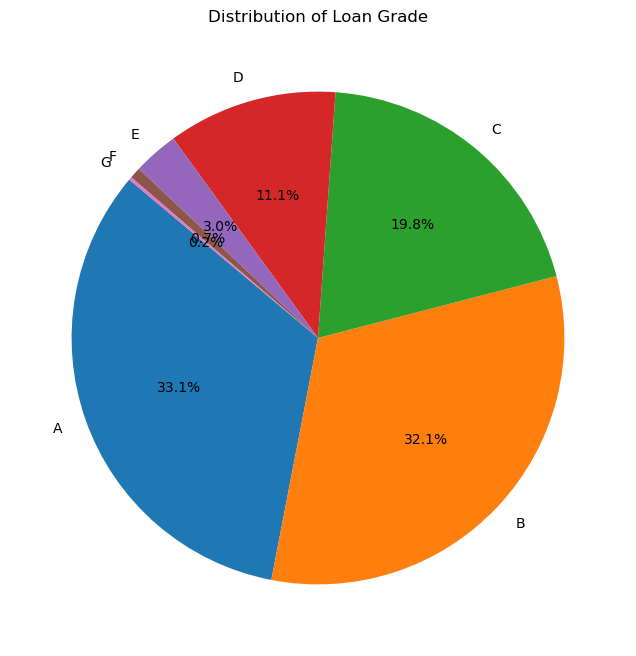

In [3]:
# Creating a pie chart to visualise all discrete datapoints in the dataset
column_data3 = dataset['loan_grade'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(column_data3, labels=column_data3.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Grade')
plt.show

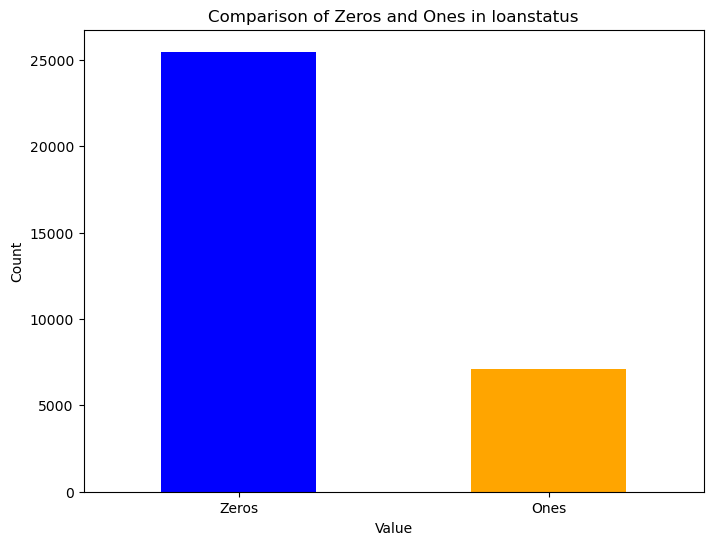

In [4]:
#Checking to see the distribution of Loans Given vs Loans Rejected to see if dataset is skewed
column_data3 = dataset['loan_status'].value_counts()

plt.figure(figsize=(8, 6))
column_data3.plot(kind='bar', color=['blue', 'orange'])
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Comparison of Zeros and Ones in loanstatus')
plt.xticks(ticks=[0, 1], labels=['Zeros', 'Ones'], rotation=0)

# Show the plot
plt.show()

#Through this, One can tell the dataset is skewed and when preprocessing for the model, will have to use UnderSampling

In [5]:
# Checking for Duplicate and missing rows
print("Duplicate Rows:", len(dataset) - len(dataset.drop_duplicates()))
print("Null Rows:", dataset.isnull().all(axis = 1).sum())

Duplicate Rows: 165
Null Rows: 0


In [6]:
#Now we need to see if there are any NULL values in any column
null_rows = pd.DataFrame(dataset.isnull().sum(), columns = ['Count'])
null_rows['Percentage'] = round(dataset.isnull().sum()/dataset.shape[0] * 100,2)
null_rows
#There are 865 null values in person_emp_legnth and 3116 null values in loan_int_rate
#These values need to be handled properly.

,Count,Percentage
person_age,0,0.00
person_income,0,0.00
person_home_ownership,0,0.00
person_emp_length,895,2.75
loan_intent,0,0.00
loan_grade,0,0.00
loan_amnt,0,0.00
loan_int_rate,3116,9.56
loan_status,0,0.00
loan_percent_income,0,0.00


In [7]:
#Given the loan_int_rate and the employment rate of the person could likely directly affect whether the loan is accepted or rejected
#It is better to drop the rows where these values are missing
dataset = dataset.dropna(subset=['person_emp_length'])
dataset = dataset.dropna(subset=['loan_int_rate'])
dataset = dataset.drop_duplicates()
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [8]:
#Now lets visualise all the different types of continous data
continous_data = dataset.select_dtypes(include=['int64', 'float64'])
continous_data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


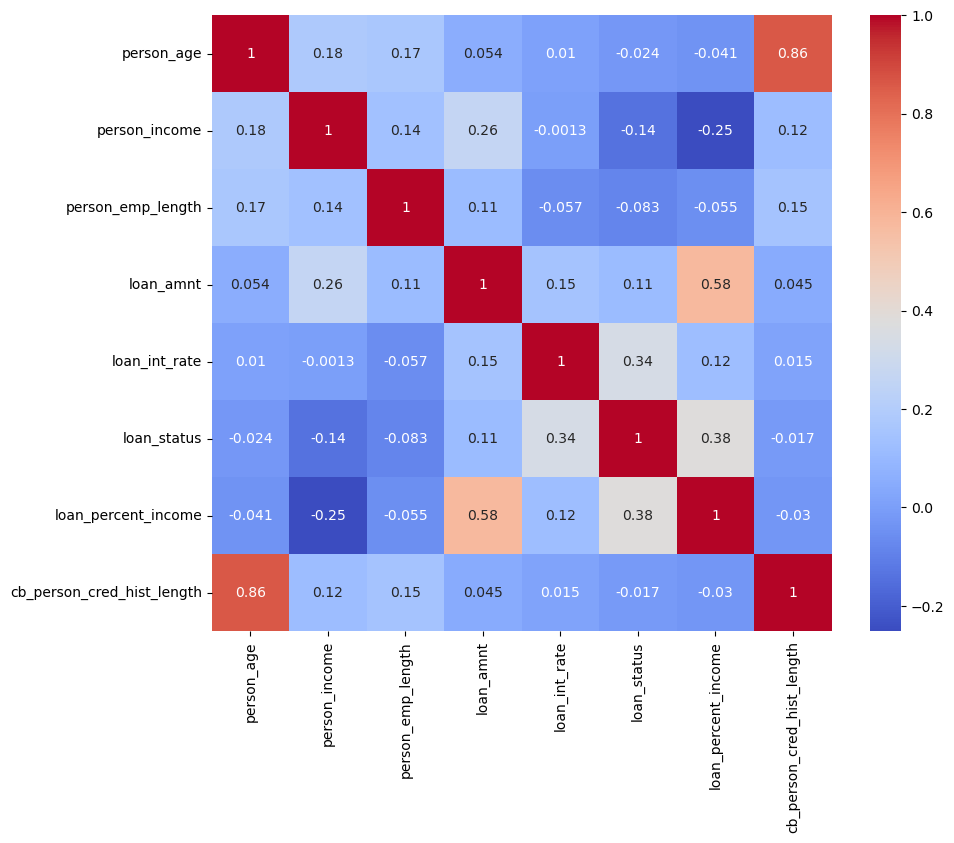

In [9]:
# Correlation matrix to show potential relations between features in the data 
plt.figure(figsize=(10, 8))
sns.heatmap(continous_data.corr(), annot=True, cmap='coolwarm')
plt.show()
#Strong Relations between age and employment history as well as loan amount and percentage of askers income as expected
#Interestingly - age and income and age and employment legnth have no correlation with one another.
#To be further investigated

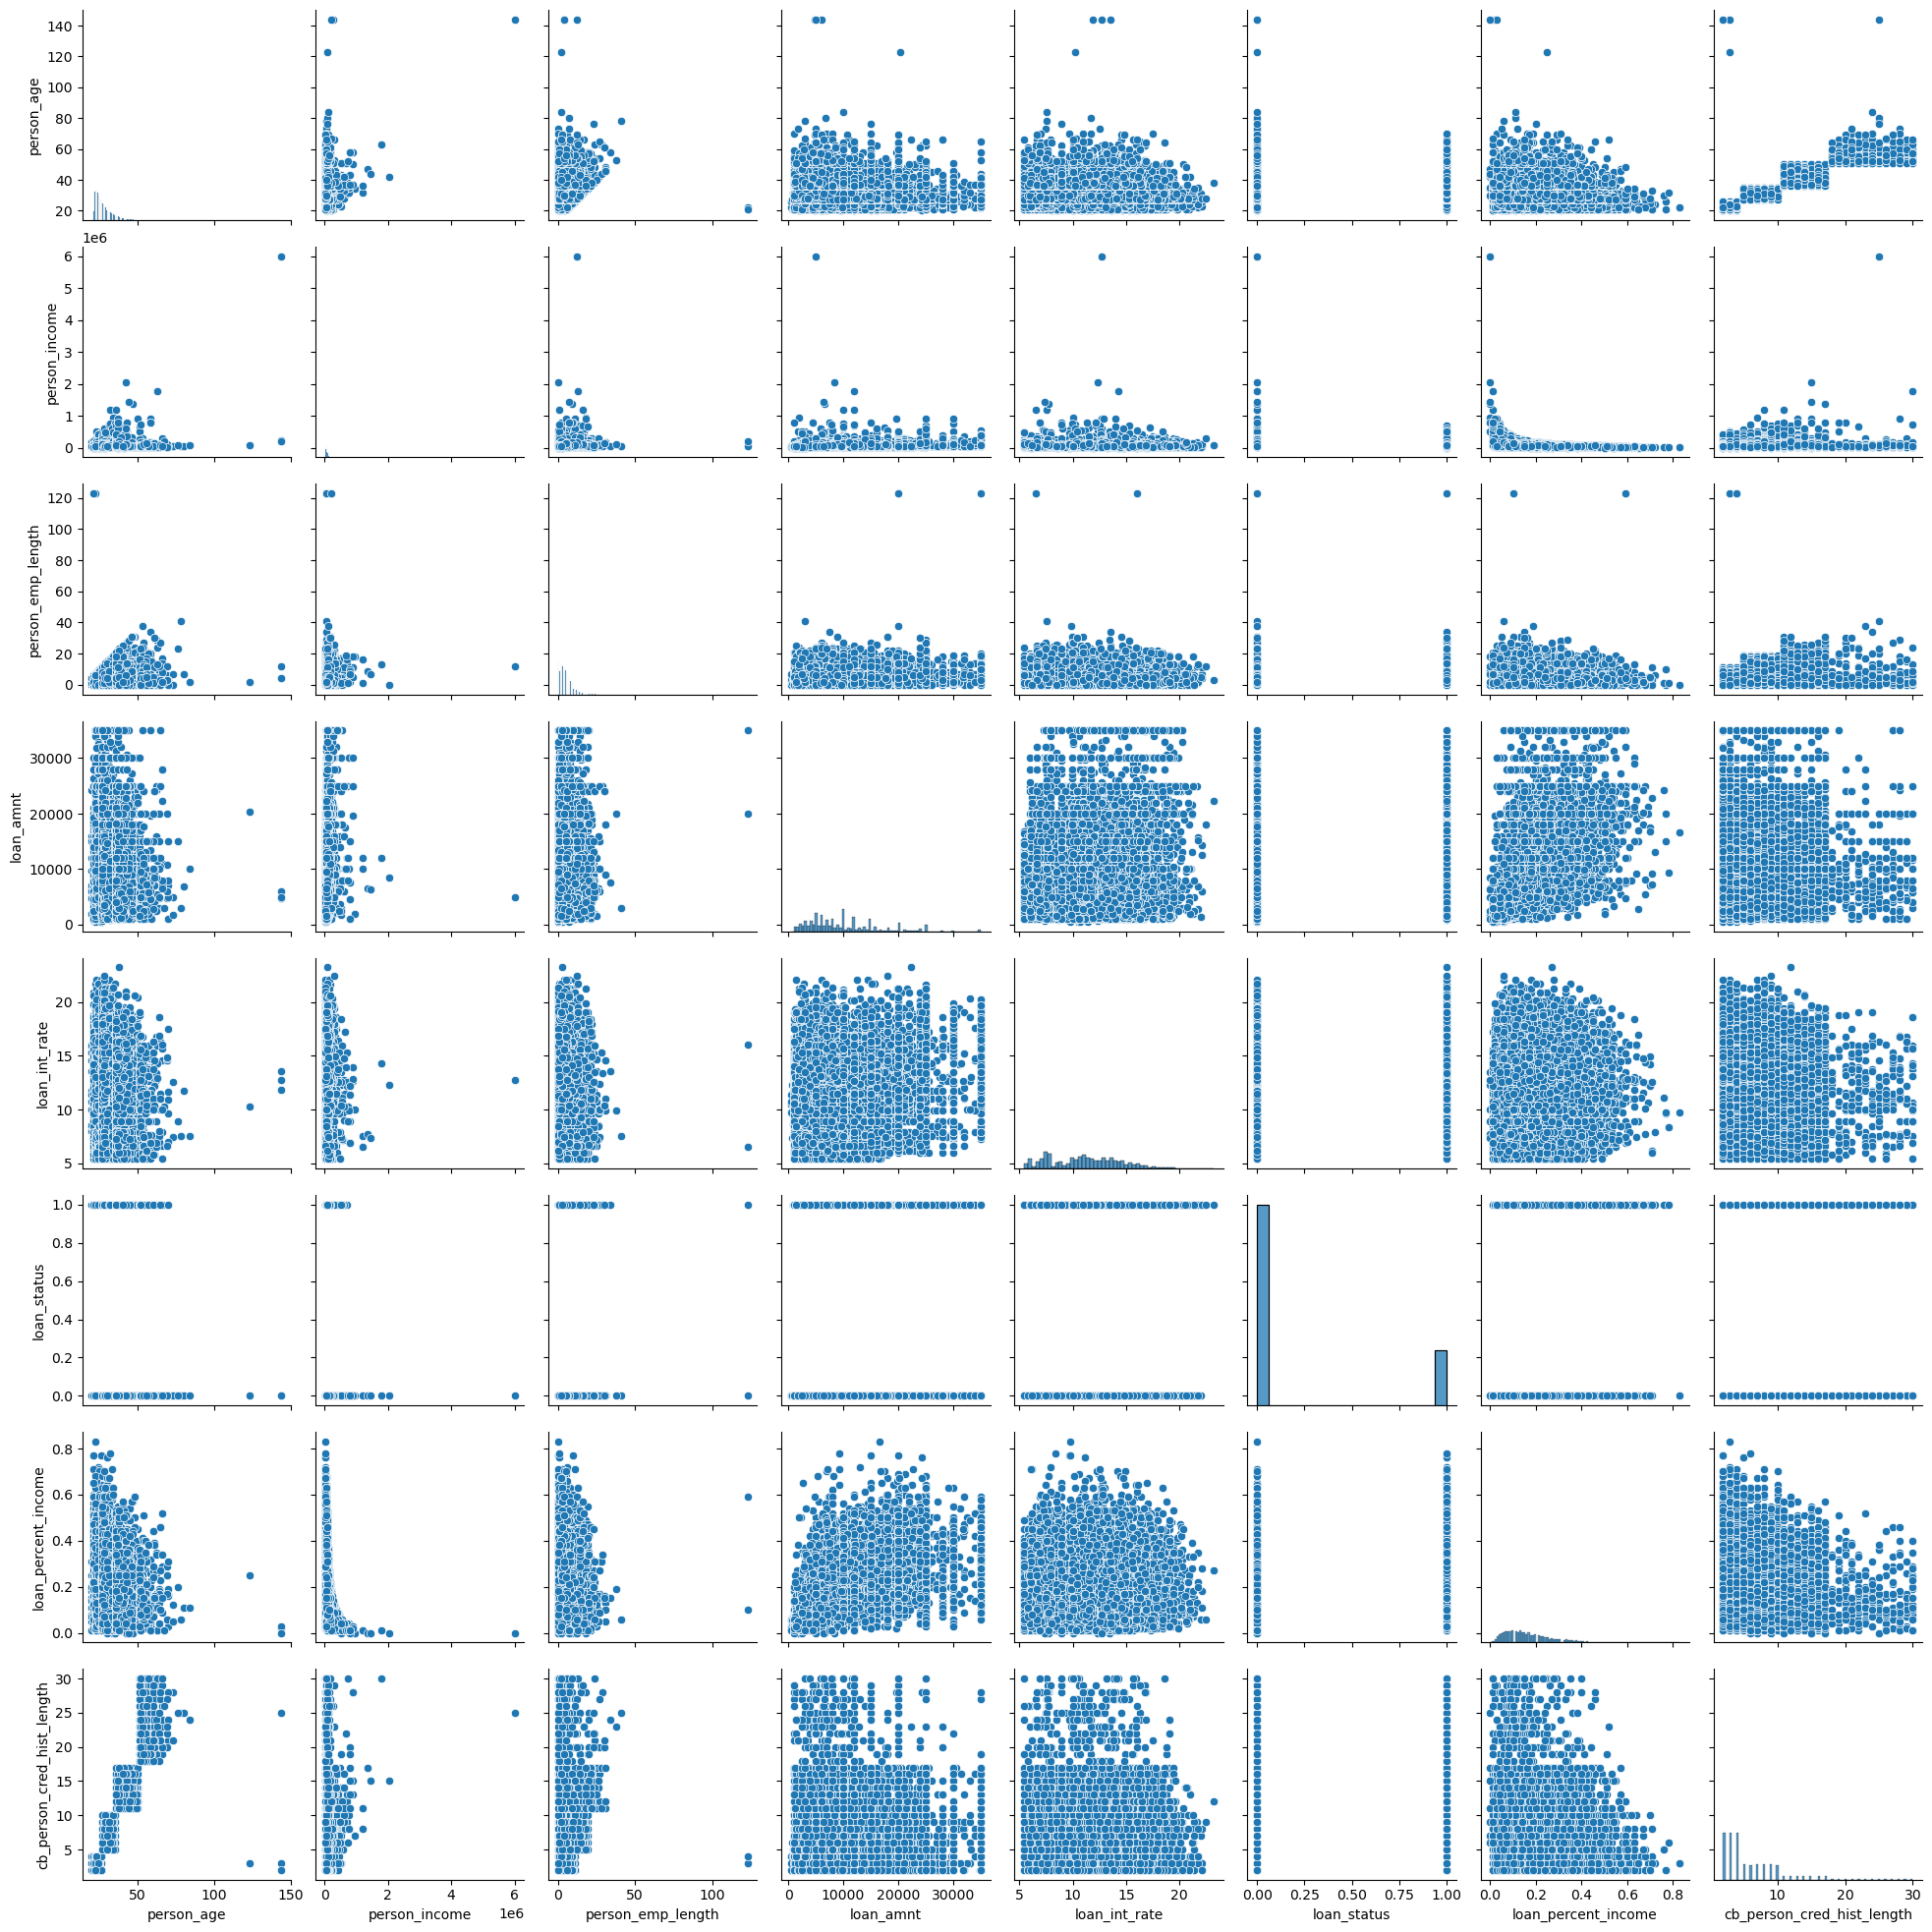

In [10]:
#Now to visualise the numerical data and look for outliers that need to be removed
sns.pairplot(data=continous_data)
#From this pairplot, A few outliers can immediately be seen in age and employment legnth that should be removed.

In [11]:
age_outlier= dataset[dataset["person_age"] > 75].shape[0]
outliers_emp_length = dataset[dataset['person_emp_length'] > 75].shape[0]
print("Number of outliers in Age:", age_outlier)
print("Number of outliers in Employment Length:", outliers_emp_length)

Number of outliers in Age: 8
Number of outliers in Employment Length: 2


In [12]:
#To remove the found outliers
dataset = dataset[dataset["person_age"] <= 75]
dataset = dataset[dataset['person_emp_length'] <= 75]

In [13]:
#Before using K-Cross Validation to split the set the categorical features need to be one hot encoded to enable training
dataset.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [14]:
columns_to_encode = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
dataset = pd.get_dummies(dataset, columns=columns_to_encode)
dataset

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,...,0,0,1,0,0,0,0,0,1,0


In [19]:
from sklearn.preprocessing import MinMaxScaler
temp = MinMaxScaler().fit(dataset)
array = temp.transform(dataset)
data = pd.DataFrame(array, columns=dataset.columns)
data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.018868,0.002751,0.131579,0.014493,0.321348,0.0,0.120482,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.094340,0.002751,0.026316,0.144928,0.418539,1.0,0.686747,0.035714,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.056604,0.030209,0.105263,1.000000,0.551124,1.0,0.638554,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.075472,0.024757,0.210526,1.000000,0.497191,1.0,0.662651,0.071429,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.018868,0.002898,0.052632,0.057971,0.096629,1.0,0.301205,0.000000,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28486,0.698113,0.024069,0.026316,0.153623,0.434831,0.0,0.132530,1.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
28487,0.641509,0.056981,0.105263,0.496377,0.116292,0.0,0.180723,0.607143,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28488,0.849057,0.035367,0.078947,1.000000,0.312921,1.0,0.554217,0.928571,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28489,0.679245,0.071717,0.131579,0.420290,0.340449,0.0,0.120482,0.857143,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
data.to_csv('standardized_data.csv', index=False)